In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
dataset = pd.read_csv('../MyPython/dataset/Salary_Data.csv', delimiter=';')

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

print("Visualización de los primeros 5 registros:")
print(dataset.head())
print("\nForma de los datos X:", X.shape)
print("Forma de los datos y:", y.shape)

Visualización de los primeros 5 registros:
   Años de experiencia  Salario
0                  1.1    39343
1                  1.3    46205
2                  1.5    37731
3                  2.0    43525
4                  2.2    39891

Forma de los datos X: (30, 1)
Forma de los datos y: (30,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("\n¡Modelo entrenado exitosamente!")


¡Modelo entrenado exitosamente!


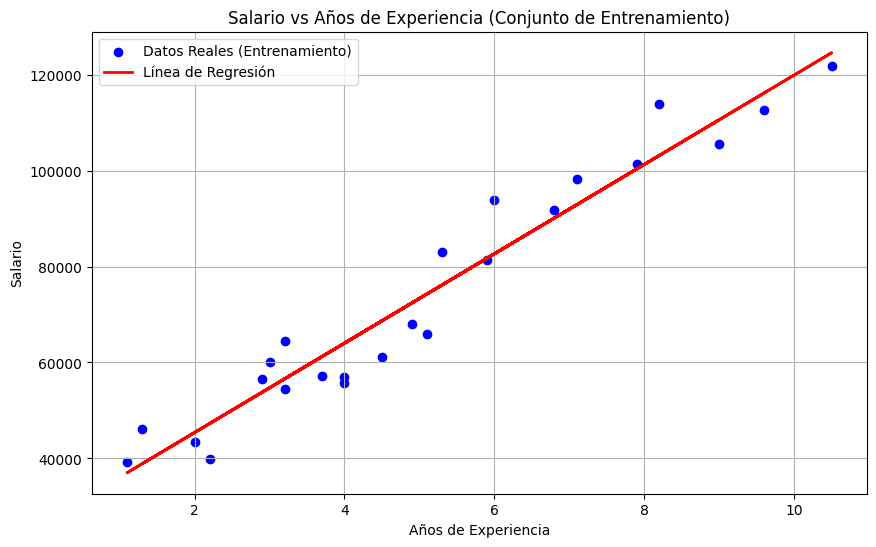

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos Reales (Entrenamiento)')
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Línea de Regresión')

plt.title('Salario vs Años de Experiencia (Conjunto de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.grid(True)
plt.show()

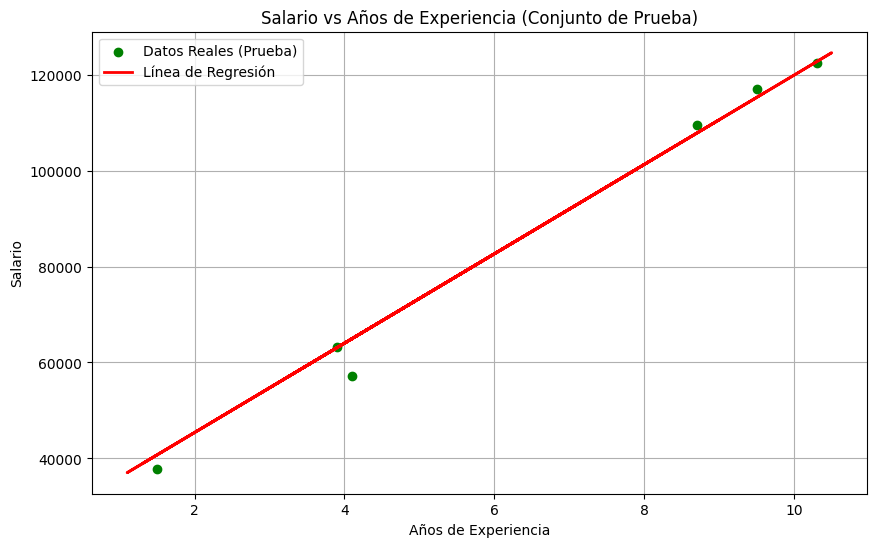

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Datos Reales (Prueba)')
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Línea de Regresión')

plt.title('Salario vs Años de Experiencia (Conjunto de Prueba)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.grid(True)
plt.show()

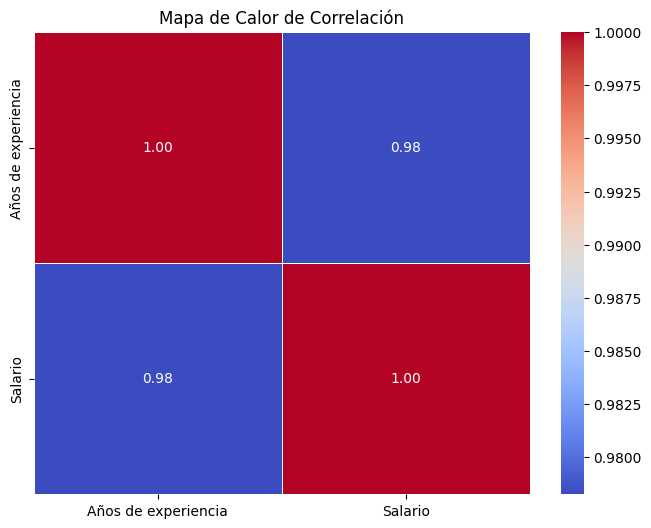

In [23]:
# 2. Crear el mapa de calor
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,       
    cmap='coolwarm',   
    fmt='.2f',         
    linewidths=.5
)

plt.title('Mapa de Calor de Correlación')
plt.show()